# Creating a Point geometry
The Eiffel Tower is an iron lattice tower built in the 19th century, and is probably the most iconic view of Paris.

The location of the Eiffel Tower is: x of 255422.6 and y of 6250868.9.

- Import the Point class from shapely.
- Create a shapely point object with the coordinates of the Eiffel Tower and assign it to a variable called ```eiffel_tower```.
- Print the result.

In [1]:
# Import the Point geometry
from shapely.geometry import Point

# Construct a point object for the Eiffel Tower
eiffel_tower = Point(255422.6, 6250868.9)

# Print the result
print(eiffel_tower)

POINT (255422.6 6250868.9)


# Shapely's spatial methods
Now we have a shapely ```Point``` object for the Eiffel Tower, we can use the different methods available on such a geometry object to perform spatial operations, such as calculating a distance or checking a spatial relationship.

We repeated the construction of ```eiffel_tower```, and also provide the code that extracts one of the neighbourhoods (the Montparnasse district), as well as one of the restaurants located within Paris.

- Check if the Eiffel Tower is located within the Montparnasse district.
- Check if the Montparnasse district contains the restaurant location.
- Calculate the distance between the Eiffel Tower and the restaurant (note: in this case, the distance is returned in meters).

In [2]:
import geopandas 
import pandas as pd

districts = geopandas.read_file('../data/paris_districts_utm.geojson')
restaurants = geopandas.read_file("../data/paris_restaurants.csv")
restaurants.x = restaurants.x.astype('float')
restaurants.y = restaurants.y.astype('float')
restaurants.geometry = geopandas.points_from_xy(restaurants.x, restaurants.y)

# Construct a point object for the Eiffel Tower
eiffel_tower = Point(255422.6, 6250868.9)

# Accessing the Montparnasse geometry (Polygon) and restaurant
district_montparnasse = districts.loc[52, 'geometry']
resto = restaurants.loc[956, 'geometry']

# Is the Eiffel Tower located within the Montparnasse district?
print(eiffel_tower.within(district_montparnasse))

# Does the Montparnasse district contains the restaurant?
print(district_montparnasse.contains(resto))

# The distance between the Eiffel Tower and the restaurant?
print(eiffel_tower.distance(resto))

False
False
4431.459825587039


# In which district in the Eiffel Tower located?
Let's return to the Eiffel Tower example. In previous exercises, we constructed a ```Point``` geometry for its location, and we checked that it was not located in the Montparnasse district. Let's now determine in which of the districts of Paris it is located.

The ```districts``` GeoDataFrame has been loaded, and the Shapely and GeoPandas libraries are imported.

- Create a boolean ```mask``` (or filter) indicating whether each district contains the Eiffel Tower or not. Call the result mask.
- Filter the ```districts``` dataframe with the boolean mask and print the result.

In [17]:
# Construct a point object for the Eiffel Tower
eiffel_tower = Point(449351, 5411450.76)#Point(488583.7, 6250868.9)

# Create a boolean Series
mask = districts.contains(eiffel_tower)

# Print the boolean Series
print(mask.head())

# Filter the districts with the boolean mask
print(districts[mask])

0    False
1    False
2    False
3    False
4    False
dtype: bool
    id district_name  population  \
25  26     Invalides        6276   

                                             geometry  
25  POLYGON ((450043.260 5411198.684, 450044.889 5...  


# How far is the closest restaurant?
Now, we might be interested in the restaurants nearby the Eiffel Tower. To explore them, let's visualize the Eiffel Tower itself as well as the restaurants within 1km.

To do this, we can calculate the distance to the Eiffel Tower for each of the restaurants. Based on this result, we can then create a mask that takes True if the restaurant is within 1km, and False otherwise, and use it to filter the restaurants GeoDataFrame. Finally, we make a visualization of this subset.

The restaurants GeoDataFrame has been loaded, and the eiffel_tower object created. Further, matplotlib, GeoPandas and contextily have been imported.

- Calculate the distance to the Eiffel Tower for each restaurant, and call the result dist_eiffel.
- Print the distance to the closest restaurant (which is the minimum of dist_eiffel).

460.6976028277898


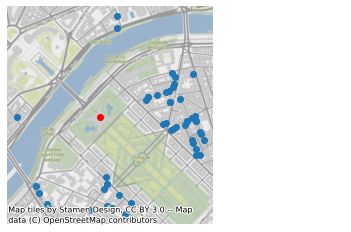

In [27]:
import contextily
import matplotlib.pyplot as plt

eiffel_tower = Point(255422.6, 6250868.9)

# The distance from each restaurant to the Eiffel Tower
dist_eiffel = restaurants.distance(eiffel_tower)

# The distance to the closest restaurant
print(dist_eiffel.min())

# Filter the restaurants for closer than 1 km
restaurants_eiffel = restaurants[dist_eiffel < 1000]

# Make a plot of the close-by restaurants
ax = restaurants_eiffel.plot()
geopandas.GeoSeries([eiffel_tower]).plot(ax=ax, color='red')
contextily.add_basemap(ax)
ax.set_axis_off()
plt.show()

# Paris: spatial join of districts and bike stations
Let's return to the Paris data on districts and bike stations. We will now use the spatial join operation to identify the district in which each station is located.

The districts and bike sharing stations datasets are already pre-loaded for you as the districts and stations GeoDataFrames, and GeoPandas has been imported as geopandas

- Use the geopandas.sjoin() function to add the district name in which each station is located to the stations dataset. Call the result joined.
- Check the result by showing the first five rows.

In [28]:
stations = geopandas.read_file('../data/paris_sharing_bike_stations_utm.geojson')

# Join the districts and stations datasets
joined = geopandas.sjoin(stations, districts, op = 'within')

# Inspect the first five rows of the result
print(joined.head())

                                       name  bike_stands  available_bikes  \
0                    14002 - RASPAIL QUINET           44                4   
143  14112 - FAUBOURG SAINT JACQUES CASSINI           16                0   
293               14033 - DAGUERRE GASSENDI           38                1   
346     14006 - SAINT JACQUES TOMBE ISSOIRE           22                0   
429       14111 - DENFERT-ROCHEREAU CASSINI           24                8   

                           geometry  index_right  id district_name  population  
0    POINT (450804.449 5409797.268)           52  53  Montparnasse       18570  
143  POINT (451419.447 5409421.529)           52  53  Montparnasse       18570  
293  POINT (450708.228 5409406.941)           52  53  Montparnasse       18570  
346  POINT (451340.026 5409124.575)           52  53  Montparnasse       18570  
429  POINT (451274.511 5409609.731)           52  53  Montparnasse       18570  


# Map of tree density by district (1)
Using a dataset of all trees in public spaces in Paris, the goal is to make a map of the tree density by district. For this, we first need to find out how many trees each district contains, which we will do in this exercise. In the following exercise, we will then use this result to calculate the density and create a map.

To obtain the tree count by district, we first need to know in which district each tree is located, which we can do with a spatial join. Then, using the result of the spatial join, we will calculate the number of trees located in each district using the pandas 'group-by' functionality.

GeoPandas has been imported as geopandas.

- Import the trees dataset "paris_trees.gpkg" and call the result trees. 
- Also read the districts dataset we have seen previously ("paris_districts_utm.geojson"), and call this districts.
- Add a column with the 'district_name' to the trees dataset using a spatial join. Call the result joined.
- Calculate the number of trees located in each district: group the joined DataFrame by the 'district_name' column, and calculate the size of each group. We convert the resulting Series trees_by_district to a DataFrame for the next exercise.

In [33]:
# Read the trees and districts data
trees = geopandas.read_file('../data/paris_trees_small.gpkg')
districts = geopandas.read_file('../data/paris_districts_utm.geojson')

# The trees dataset with point locations of trees
joined = geopandas.sjoin(trees, districts, op='within')

# Calculate the number of trees in each district
trees_by_district = joined.groupby(['district_name']).size()

# Convert the series to a DataFrame and specify column name
trees_by_district = trees_by_district.to_frame(name='n_trees')

# Inspect the result
print(trees_by_district.head())

C:\ProgramData\Anaconda3\lib\site-packages\geopandas\tools\sjoin.py:61: UserWarning: CRS of frames being joined does not match!({'init': 'epsg:32631'} != {'init': 'epsg:4326'})
  "(%s != %s)" % (left_df.crs, right_df.crs)


                 n_trees
district_name           
Amérique             183
Archives               8
Arsenal               60
Arts-et-Metiers       20
Auteuil              392


# Map of tree density by district (2)

Now we have obtained the number of trees by district, we can make the map of the districts colored by the tree density.

For this, we first need to merge the number of trees in each district we calculated in the previous step (trees_by_district) back to the districts dataset. We will use the pd.merge() function to join two dataframes based on a common column.

Since not all districts have the same size, it is a fairer comparison to visualize the tree density: the number of trees relative to the area.

The district dataset has been pre-loaded as districts, and the final result of the previous exercise (a DataFrame with the number of trees for each district) is available as trees_by_district. GeoPandas has been imported as geopandas and Pandas as pd.

- Use the pd.merge() function to merge districts and trees_by_district dataframes on the 'district_name' column. 
- Call the result districts_trees.
- Add a column 'n_trees_per_area' to the districts_trees dataframe, based on the 'n_trees' column divided by the area.
- Make a plot of the districts_trees dataframe, using the 'n_trees_per_area' column to determine the color of the polygons.

                 n_trees
district_name           
Amérique             183
Archives               8
Arsenal               60
Arts-et-Metiers       20
Auteuil              392
   id           district_name  population  \
0   1  St-Germain-l'Auxerrois        1672   
1   2                  Halles        8984   
2   3            Palais-Royal        3195   
3   4           Place-Vendôme        3044   
4   5                 Gaillon        1345   

                                            geometry  n_trees  
0  POLYGON ((451922.133 5411438.484, 451922.080 5...       40  
1  POLYGON ((452278.419 5412160.893, 452192.407 5...       40  
2  POLYGON ((451553.806 5412340.522, 451528.058 5...        4  
3  POLYGON ((451004.908 5412654.095, 450960.640 5...        7  
4  POLYGON ((451328.752 5412991.278, 451294.721 5...        7  


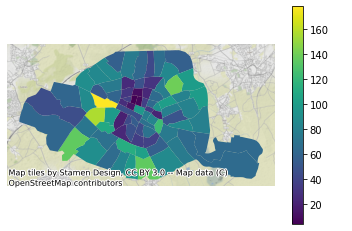

In [44]:
# Print the first rows of the result of the previous exercise
print(trees_by_district.head())

# Merge the 'districts' and 'trees_by_district' dataframes
districts_trees = pd.merge(districts, trees_by_district, on='district_name')

# Inspect the result
print(districts_trees.head())

# Add a column with the tree density
districts_trees['n_trees_per_area'] = districts_trees['n_trees'] / districts_trees.geometry.area * 10**6

# Make of map of the districts colored by 'n_trees_per_area'
ax = districts_trees.plot(column = 'n_trees_per_area', legend=True)
contextily.add_basemap(ax)
ax.set_axis_off()
plt.show()


# Equal interval choropleth
In the last exercise, we created a map of the tree density. Now we know more about choropleths, we will explore this visualisation in more detail.

First, let's visualize the effect of just using the number of trees versus the number of trees normalized by the area of the district (the tree density). Second, we will create an equal interval version of this map instead of using a continuous color scale. This classification algorithm will split the value space in equal bins and assign a color to each.

The district_trees GeoDataFrame, the final result of the previous exercise is already loaded. It includes the variable n_trees_per_area, measuring tree density by district (note the variable has been multiplied by 10,000).

- Make a plot using the 'n_trees' variable to color the polygons. Make sure to also display a legend using the legend keyword.
- Repeat the same using the 'n_trees_per_area' variable. Do you see the difference?
- Generate a choropleth with the 'n_trees_per_area' variable using an equal interval classification scheme. Again, make sure to add a legend.

   id           district_name  population  \
0   1  St-Germain-l'Auxerrois        1672   
1   2                  Halles        8984   
2   3            Palais-Royal        3195   
3   4           Place-Vendôme        3044   
4   5                 Gaillon        1345   

                                            geometry  n_trees  \
0  POLYGON ((451922.133 5411438.484, 451922.080 5...       40   
1  POLYGON ((452278.419 5412160.893, 452192.407 5...       40   
2  POLYGON ((451553.806 5412340.522, 451528.058 5...        4   
3  POLYGON ((451004.908 5412654.095, 450960.640 5...        7   
4  POLYGON ((451328.752 5412991.278, 451294.721 5...        7   

   n_trees_per_area  
0         46.054411  
1         97.031529  
2         14.622589  
3         25.992249  
4         37.251926  


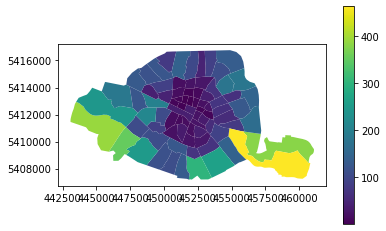

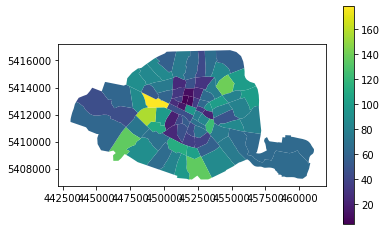

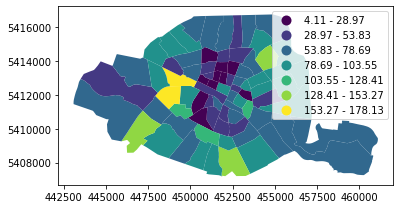

In [45]:
# Print the first rows of the tree density dataset
print(districts_trees.head())

# Make a choropleth of the number of trees 
districts_trees.plot(column = 'n_trees', legend = True)
plt.show()

# Make a choropleth of the number of trees per area
districts_trees.plot(column = 'n_trees_per_area', legend = True)
plt.show()

# Make a choropleth of the number of trees 
districts_trees.plot(column = 'n_trees_per_area', scheme = 'equal_interval', k = 7, legend = True)
plt.show()

# Quantiles choropleth
In this exercise we will create a quantile version of the tree density map. Remember that the quantile algorithm will rank and split the values into groups with the same number of elements to assign a color to each. This time, we will create seven groups that allocate the colors of the YlGn colormap across the entire set of values.

The district_trees GeoDataFrame is again already loaded. It includes the variable n_trees_per_area, measuring tree density by district (note the variable has been multiplied by 10,000).

- Generate a choropleth using the 'n_trees_per_area' variable, a quantile classification scheme with 7 classes and the YlGn color map. Assign the result to a variable named ax.
- Remove the frames, ticks and tick labels from the plot for a cleaner map using the set_axis_off() method.

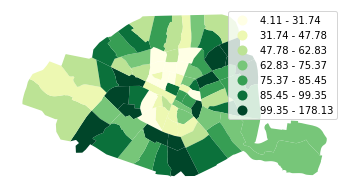

In [46]:
# Generate the choropleth and store the axis
ax= districts_trees.plot(column='n_trees_per_area', scheme='quantiles',
                          k=7, cmap='YlGn', legend=True)

# Remove frames, ticks and tick labels from the axis
ax.set_axis_off()
plt.show()

# Compare classification algorithms
In this final exercise, you will build a multi map figure that will allow you to compare the two approaches to map variables we have seen.

You will rely on standard matplotlib patterns to build a figure with two subplots (Axes axes[0] and axes[1]) and display in each of them, respectively, an equal interval and quantile based choropleth. Once created, compare them visually to explore the differences that the classification algorithm can have on the final result.

This exercise comes with a GeoDataFrame object loaded under the name district_trees that includes the variable n_trees_per_area, measuring tree density by district.

- Make a choropleth for the 'n_trees_per_area' column using the equal interval classification scheme on the first subplot (axes[0]). Remember that you can pass the matplotlib axes object to the ax keyword.
- Do the same for the quantile classification scheme on the second subplot (axes[1]). As in the previous plot, set the title and remove the box and axis labels to create a cleaner figure.

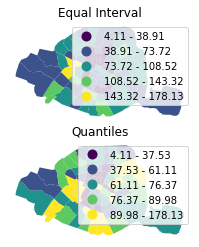

In [47]:
# Set up figure and subplots
fig, axes = plt.subplots(nrows=2)

# Plot equal interval map
districts_trees.plot(column = 'n_trees_per_area', scheme = 'equal_interval', k=5, legend=True, ax=axes[0])
axes[0].set_title('Equal Interval')
axes[0].set_axis_off()

# Plot quantiles map
districts_trees.plot(column = 'n_trees_per_area', scheme = 'quantiles', k=5, legend=True, ax=axes[1])
axes[1].set_title('Quantiles')
axes[1].set_axis_off()

# Display maps
plt.show()